# New Age Portfolio: Monte Carlo Simulation

In [1]:
#Import necessary libraries
import pandas as pd
from MCForecastTools import MCSimulation
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot as hv
import streamlit as st

## Data cleaning

In [2]:
# Import ticker data
tickers = ['AAPL', 'BTC-USD', 'USDT-USD', 'ETH-USD', 'TSLA', 'LIT', 'SQ', 'URNM']
data = yf.download(tickers, start="2018-11-30", end="2021-11-01")
data.dropna(inplace=True)

[*********************100%***********************]  8 of 8 completed


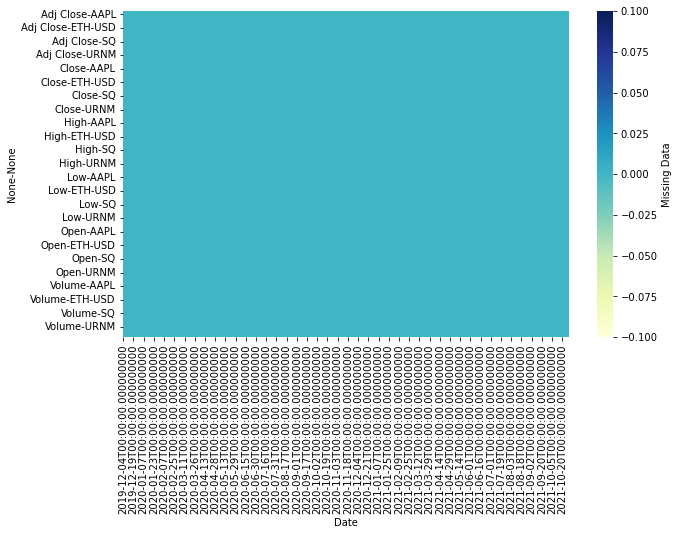

In [3]:
# Assess nulls in data
data
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

## Monte Carlo 

In [4]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = data,
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3],
    num_simulation = 1000,
    num_trading_days = 252 * 1
)

In [5]:
# Print the simulation input data
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/danielsmith/Desktop/Project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004848,1.000837,0.996885,1.006454,0.996441,0.998474,0.974617,1.011741,1.005152,1.009843,...,1.002793,1.014477,0.987513,0.994402,0.988040,1.008207,1.011477,1.009521,1.016703,0.984604
2,1.018250,1.012360,1.001630,1.020726,1.003427,1.016079,0.964278,1.006142,1.009059,0.999581,...,1.025238,1.009297,0.988577,1.017222,0.991690,1.011787,0.989982,0.999639,1.011246,0.986865
3,1.013428,1.032416,1.021893,1.036841,0.995481,1.029207,0.973337,1.011498,1.005239,1.009801,...,1.042985,1.005161,0.994989,1.035104,0.997614,0.991444,0.989556,1.008333,1.033284,0.987770
4,1.039214,1.058901,1.009790,1.041718,0.985649,1.036715,1.000502,1.010773,1.006346,1.016707,...,1.059104,1.006361,0.997293,1.023749,1.015096,1.018212,0.996798,1.029182,1.056121,0.984303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.696980,1.956828,1.986526,2.257160,2.382553,2.023268,1.831801,2.063113,2.619633,2.567132,...,2.583037,2.364919,1.887023,2.002359,2.072339,2.472319,2.543907,2.386334,2.369057,2.138425
249,1.713231,1.992621,1.987334,2.248157,2.365862,2.016247,1.848869,2.098404,2.614717,2.566798,...,2.640162,2.390694,1.875571,2.018023,2.091835,2.438619,2.538995,2.406836,2.332796,2.124359
250,1.699905,1.962980,2.036233,2.247831,2.320651,2.014594,1.853041,2.096718,2.604864,2.593843,...,2.672055,2.391027,1.853844,1.991216,2.089627,2.427495,2.503548,2.404126,2.354482,2.089459
251,1.710266,1.985631,2.044142,2.270514,2.332162,2.002550,1.875082,2.114920,2.629010,2.578593,...,2.695483,2.407986,1.859835,2.023113,2.067405,2.376091,2.489487,2.443025,2.371833,2.131319


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

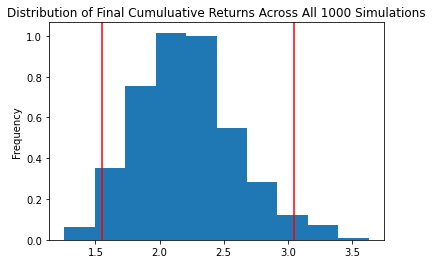

In [6]:
#Show the results in a plot distrubution chart
MC_thirty_year.plot_distribution()

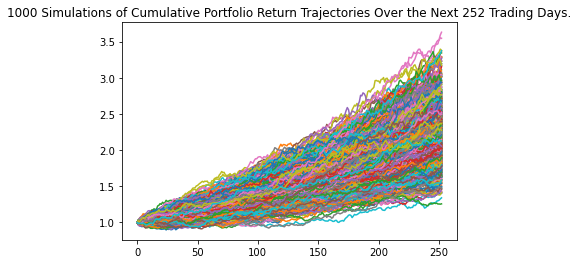

In [7]:
#Show the cummalative returns of the next 1260 trading days as a line plot.
line_plot = MC_thirty_year.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight") 

In [8]:
#Print the summary statistics 
tbl = MC_thirty_year.summarize_cumulative_return()
print(tbl)

count           1000.000000
mean               2.212646
std                0.383155
min                1.257284
25%                1.932679
50%                2.194384
75%                2.438999
max                3.629908
95% CI Lower       1.552464
95% CI Upper       3.049102
Name: 252, dtype: float64


In [9]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 30 years will end within in the range of $15524.64 and $30491.02


## A modern portfolio

In [10]:
#Change the weights and apply the portfolio to be more crypto centric given the desire of a crypto portfolio in new age portfolios.
MC_thirtyyear = MCSimulation(
    portfolio_data = data,
    weights = [0.05,0.25,0.25,0.25,0.05,0.05,0.05,0.05],
    num_simulation = 1000,
    num_trading_days = 252 * 1
)

In [11]:
#Run the results.
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/danielsmith/Desktop/Project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987909,1.032728,0.967291,1.000354,0.987107,1.000648,1.054539,1.026421,1.000205,0.958287,...,1.026220,1.023110,1.029746,0.996234,0.996941,1.004640,0.991925,1.017822,1.041540,0.989180
2,0.951780,1.048994,0.971983,0.995529,0.963220,1.016631,1.084119,1.008788,0.986120,1.007093,...,1.038670,1.042013,1.039841,1.003069,0.982713,1.014307,1.030483,1.027189,1.056374,0.984914
3,0.962969,1.070488,0.974221,0.987159,0.975754,0.994704,1.061989,1.032250,0.973637,1.025659,...,1.063773,1.078096,1.043859,0.977912,0.970699,1.037277,0.998517,1.003131,1.029610,0.998953
4,0.979684,1.114215,0.993675,0.961602,0.942950,1.013835,1.099063,1.054653,0.994373,1.035284,...,1.082144,1.076725,0.999869,0.986328,0.997614,1.045169,0.974787,1.014162,1.001616,0.994948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3.841299,4.006506,2.756720,5.090349,2.683557,3.277195,4.137356,2.550996,2.555480,4.098429,...,2.638079,4.759183,2.888932,3.082053,4.824157,3.499004,4.128132,3.261188,5.777323,3.858913
249,3.823270,4.105113,2.819509,5.221042,2.672105,3.337176,4.244570,2.508054,2.541570,4.079198,...,2.688334,4.978256,2.896237,3.028644,4.878158,3.544518,4.176628,3.236443,5.859054,3.848500
250,3.865593,3.955917,2.836148,5.351440,2.751104,3.340500,3.995753,2.460618,2.584135,4.131017,...,2.835304,4.937901,2.860931,2.890032,4.895409,3.575909,4.183000,3.264699,5.823960,3.974152
251,3.904400,3.942645,2.942547,5.270823,2.727980,3.330929,4.134947,2.461263,2.596958,4.167513,...,2.850031,5.082483,2.953016,2.954765,4.953109,3.497195,4.182397,3.349725,5.736947,3.935776


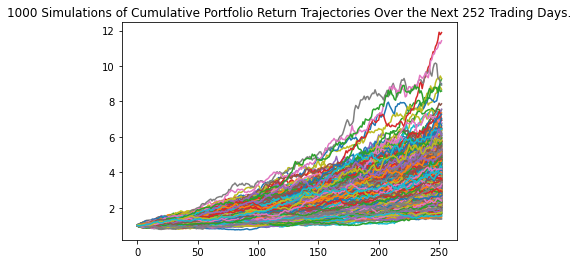

In [12]:
#Assess the new data in a line plot.
line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight") 

In [13]:
#Print summary statistics.
tbl = MC_thirtyyear.summarize_cumulative_return()
print(tbl)

count           1000.000000
mean               3.716346
std                1.278809
min                1.359840
25%                2.785001
50%                3.508846
75%                4.387396
max               11.884068
95% CI Lower       1.867388
95% CI Upper       6.571440
Name: 252, dtype: float64


In [14]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 30 years will end within in the range of $18673.88 and $65714.4
